# 선형회귀
- 선형회귀 
    - 단순선형회귀 : feature 1개
    - 다중선형회귀 : feature 2개 이상  
    

- 비용함수 (Cost Function)
    - 손실함수 (loss function), 목적함수 (objective function)
    - 오차(error)를 계산
    - MSE를 최소화하는 파라미터를 찾는다  
      
      
- 경사하강법 (Gradient Descent)
    - 최소 에러값을 찾는다

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.datasets import load_diabetes # 당뇨병 환자 데이터
def make_dataset():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.2, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [3]:
# train sample

X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
152,-0.034575,0.050680,-0.000817,0.070073,0.039710,0.066952,-0.065491,0.108111,0.026714,0.073480
417,-0.052738,-0.044642,0.071397,-0.074528,-0.015328,-0.001314,0.004460,-0.021412,-0.046879,0.003064
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073410,0.085907
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
296,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056158,-0.059067


In [4]:
# target

y_train.head()

152    292.0
417     55.0
172    295.0
438    104.0
296     89.0
Name: target, dtype: float64

<AxesSubplot:>

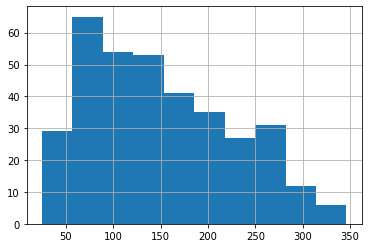

In [5]:
y_train.hist()

# 1. 선형회귀

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
pred = model.predict(X_test)

#평가 mse로 해보기 (작을수록 좋다)
mean_squared_error(y_test, pred)

2707.6236708320466

# 2. 릿지회귀
- 규제(regularization) 적용
- 오버피팅 방지
- 규제방식 : L2 규제
- 파라미터(alpha) 값 통해 조절하며, alpha 값이 커질수록 회귀 계수 값을 작게 만든다

In [7]:
# 릿지 회귀
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)

mean_squared_error(y_test, pred)

3522.1129142470336

In [8]:
# 회귀 계수
model.coef_

array([  31.29328664,  -71.4495795 ,  267.60515296,  197.36474485,
         14.61310594,  -13.88479022, -124.64995467,  106.21296774,
        221.06805238,  101.20265138])

In [9]:
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef

,alpha1
age,31.293287
sex,-71.449580
bmi,267.605153
bp,197.364745
s1,14.613106
s2,-13.884790
s3,-124.649955
s4,106.212968
s5,221.068052
s6,101.202651


In [10]:
# 릿지 회귀 (alpha = 10)

model = Ridge(alpha=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)

mean_squared_error(y_test, pred)

5521.882311176061

In [11]:
# 회귀 계수 (alpha = 10)
coef['alpha10'] = model.coef_
coef

,alpha1,alpha10
age,31.293287,16.703159
sex,-71.449580,-1.796452
bmi,267.605153,61.026348
bp,197.364745,47.435152
s1,14.613106,18.491225
s2,-13.884790,13.440080
s3,-124.649955,-35.542084
s4,106.212968,38.896129
s5,221.068052,55.276214
s6,101.202651,35.868345


* 회귀계수가 줄어들었다

In [12]:
# 릿지 회귀 (alpha = 0.1)

model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

mean_squared_error(y_test, pred)

2744.899739917671

In [13]:
coef['alpha0.1'] = model.coef_
coef

,alpha1,alpha10,alpha0.1
age,31.293287,16.703159,4.274486
sex,-71.449580,-1.796452,-205.214645
bmi,267.605153,61.026348,450.905500
bp,197.364745,47.435152,331.931307
s1,14.613106,18.491225,-84.310050
s2,-13.884790,13.440080,-54.665887
s3,-124.649955,-35.542084,-158.707920
s4,106.212968,38.896129,114.068214
s5,221.068052,55.276214,391.230355
s6,101.202651,35.868345,78.555719


* alpha가 줄어들수록 작아진다

In [14]:
# Q. 릿지 회귀의 alpha 값을 0.001, 0.01, 0.05, 0.1, 1, 10을 각각 넣어보고,
# 어떤 alpha 값이 가장 mean squared error가 작은지 찾아보세요.
# 힌트 : for문을 사용하면 좀더 효율적으로 퀴즈를 풀 수 있습니다.
from sklearn.linear_model import Ridge
lst = [0.001, 0.01, 0.05, 0.1, 1, 10]

for x in lst : 
    model = Ridge(alpha=x)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(mean_squared_error(y_test, pred))

2698.0335313137407
2675.8081810831413
2699.6575055293893
2744.899739917671
3522.1129142470336
5521.882311176061


* alpha = 0.01 일때 MSE가 가장 작다 (2675.80)

# 3. 라쏘회귀
- 규제(regularization) 적용
- 오버피팅 방지
- 규제방식 : L1 규제
- L2 에 비해 회귀계수를 급격하게 감소시켜 0으로 만든다
- (L1 규제는 중요한 feature만 선택하는 특성이 있다)

In [15]:
from sklearn.linear_model import Lasso


model = Lasso(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

4179.146884323723

In [16]:
coef = pd.DataFrame(data= model.coef_, index=X_train.columns, columns=['alpha1'])
coef

,alpha1
age,0.000000
sex,-0.000000
bmi,343.588370
bp,46.375388
s1,0.000000
s2,0.000000
s3,-0.000000
s4,0.000000
s5,245.167660
s6,0.000000


In [17]:
# 라쏘 (alpha = 2)

model = Lasso(alpha=2)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

6398.637179448666

In [18]:
coef['alpha2'] = model.coef_
coef

,alpha1,alpha2
age,0.000000,0.000000
sex,-0.000000,0.000000
bmi,343.588370,42.963888
bp,46.375388,0.000000
s1,0.000000,0.000000
s2,0.000000,0.000000
s3,-0.000000,-0.000000
s4,0.000000,0.000000
s5,245.167660,0.000000
s6,0.000000,0.000000


In [19]:
# 라쏘 (alpha = 0.05)

model = Lasso(alpha=0.05)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2703.4553190372917

In [20]:
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha2,alpha0.05
age,0.000000,0.000000,-0.000000
sex,-0.000000,0.000000,-198.953867
bmi,343.588370,42.963888,487.192794
bp,46.375388,0.000000,340.499590
s1,0.000000,0.000000,-95.578630
s2,0.000000,0.000000,-0.000000
s3,-0.000000,-0.000000,-189.868586
s4,0.000000,0.000000,10.489156
s5,245.167660,0.000000,457.331482
s6,0.000000,0.000000,39.292945


In [21]:
# Q. 라쏘 회귀의 alpha 값을 0.001, 0.01, 0.05, 0.1, 1, 10을 각각 넣어보고,
# 어떤 alpha 값이 가장 mean squared error가 작은지 찾아보세요.
from sklearn.linear_model import Lasso
lst = [0.001, 0.01, 0.05, 0.1, 1, 10]

for i in lst:
    model = Lasso(alpha=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(mean_squared_error(y_test, pred))

2701.7061476958074
2676.3844653651836
2703.4553190372917
2775.180919040914
4179.146884323723
6595.844885678807


* alpha = 0.01 일 때 MSE가 가장 작다

# 4. 엘라스틱넷 회귀
- 규제(regularization) 적용
- 규제방식 : L1 + L2 규제
- 시간이 상대적으로 오래 걸림

In [22]:
from sklearn.linear_model import ElasticNet


model = ElasticNet(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

6539.270795233337

In [23]:
# alpha 조정, L1/ L2의 비율을 조정할 수 있다

model = ElasticNet(alpha=0.0001, l1_ratio = 0.6)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2675.6005929972935

In [24]:
# Q. 엘라스틱넷 회귀의 alpha 값을 0.0001로 설정하고, 
# l1 규제의 비율 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 중
# 어떤 비율일 때 mean squared error가 가장 작은지 찾아보세요.
from sklearn.linear_model import ElasticNet
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    model = ElasticNet(alpha=0.0001, l1_ratio=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(mean_squared_error(y_test, pred))

2685.132755696321
2682.643714865139
2680.3399490838874
2678.296894792398
2676.641058527278
2675.6005929972935
2675.628009678113
2677.647505326532
2684.618200054344


* L1이 60% 일때 MSE가 가장 작다

# 5. 랜덤포레스트 & XGBoost

In [25]:
# Q. 랜덤포레스트와 xgboost 모델의 mse 값을 비교해보세요.

from sklearn.ensemble import RandomForestRegressor

model_r = RandomForestRegressor()
model_r.fit(X_train, y_train)
pred_r = model_r.predict(X_test)
print("랜덤포레스트")
print(mean_squared_error(y_test, pred_r));

랜덤포레스트
3295.325888764045


In [26]:
from xgboost import XGBRegressor

model_x = XGBRegressor()
model_x.fit(X_train, y_train)
pred_x = model_x.predict(X_test)
print("xgboost")
print(mean_squared_error(y_test, pred_x));

xgboost
4028.2455020344587


/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


* Random Forest 방식의 MSE가 더 작다

# 6. 하이퍼파라미터 튜닝

In [27]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [28]:
#하이퍼파라미터 
#GridSearch : 이 중에서 가장 best인 하이퍼파라미터 값을 출력한다.
#RandomSearch : 시간 내에 랜덤하게 뽑은 것 중에서 best인 값을 출력한다.

params = {'learning_rate':[0.07, 0.05],
         'max_depth':[3,5,7],
         'n_estimators':[100, 200],
         'subsample':[0.9, 0.8, 0.7]}

In [29]:
# 데이터 로드
def make_dataset2():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    return df.drop('target', axis=1), df['target']
X, y = make_dataset2()

# GridSearchCV
* 꼼꼼하지만 시간 오래걸림

In [30]:
#학습

xgb = XGBRegressor()
grid = GridSearchCV(xgb, params, cv=3, n_jobs=-1)  #cv : cross valiation (validation 몇개로 나눌거냐)
grid.fit(X, y)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [31]:
#최척의 하이퍼파라미터를 찾았다

grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}

In [32]:
#하이퍼파라미터 튜닝

xgb = XGBRegressor(
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 100,
    subsample = 0.7)

xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)

3173.045180496539

# Random Search 
- 랜덤으로 N개의 조합만 탐색 (시간 내 최적의 하이퍼파라미터 탐색)

In [33]:
xgb = XGBRegressor()

#n_iter : 몇 번만에 찾아라
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=10, n_jobs=-1) 
grid.fit(X, y)
pred = grid.predict(X_test)

In [34]:
#최적의 하이퍼파라미터 찾음

grid.best_params_

{'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}

In [35]:
xgb = XGBRegressor(
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 100,
    subsample = 0.7)

xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)

3173.045180496539

# 7. 평가 (회귀)

## MAE
* 평균절대오차
* 실제값과 예측값의 차이의 절댓값 평균
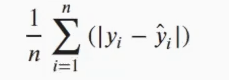

In [36]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

47.57186281011346

## MSE
* 평균제곱오차
* 실제값과 예측값의 차이를 제곱하여 평균냄
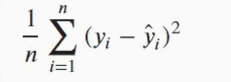

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

3173.045180496539

## RMSE
* MSE에 루트를 씌움
* MSE는 실제 오류보다 커지는 특성이 있으므로
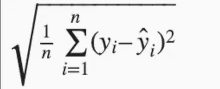

In [38]:
import numpy as np
np.sqrt(mean_squared_error(y_test, pred))

56.32978945901129

## RMSLE
* RMSE에 로그를 적용
* 예측값이 실제보다 작을 때 더 큰 패널티를 부여 ex) 배달시간
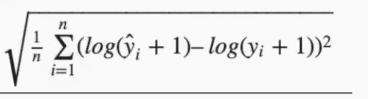

In [39]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, pred))

0.4359462312673838

## R2
* 결정계수
* 실제값의 분산대비 예측값의 분산 
* 0(성능 안좋음)<---> 1(성능 좋음)
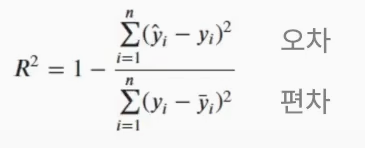

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.5153820583895429

# QUIZ

In [41]:
# 데이터 로드
def make_dataset2():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    return df.drop('target', axis=1), df['target']
X, y = make_dataset2()

In [42]:
# Q. 위 데이터로 엘라스틱넷 회귀를 돌려볼 예정입니다.
# RandomizedSearchCV 를 활용하여 다음 두 하이퍼파라미터 중 최적을 찾고,
# 'alpha':[0.0001, 0.001, 0.01, 0.1, 1]
# 'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# 최적의 하이퍼파라미터로 모델을 돌려 rmse를 측정해주세요.

params={
    'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
    'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

grid = RandomizedSearchCV(model, params, cv=3, n_jobs=-1)
grid.fit(X,y)

RandomizedSearchCV(cv=3, estimator=ElasticNet(alpha=1), n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                                        'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                     0.6, 0.7, 0.8, 0.9]})

In [43]:
# 최적의 하이퍼파라미터 찾기
grid.best_params_

{'l1_ratio': 0.1, 'alpha': 0.0001}

In [44]:
# 찾은 최적의 하이퍼파라미터로 모델을 돌려 rmse를 측정하세요.
model = ElasticNet(alpha=0.001, l1_ratio=0.7)
model.fit(X_train, y_train)
pred = model.predict(X_test)

import numpy as np
np.sqrt(mean_squared_error(y_test, pred))

52.45254982197736

* RMSE는 52.45254982197736 이다.